In [1]:
from sklearn.decomposition import PCA
from matplotlib.image import imread
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io as sio
from sklearn.preprocessing import normalize


In [2]:
X = sio.loadmat('ex7faces.mat')

X= pd.DataFrame(X['X'])

X_norm= normalize(X)
print(X)

            0           1           2           3           4          5     \
0     -37.866314  -45.866314  -53.866314  -51.866314  -40.866314 -33.866314   
1       8.133686   -0.866314   -8.866314  -15.866314  -17.866314 -16.866314   
2     -32.866314  -34.866314  -36.866314  -18.866314    6.133686  15.133686   
3     -84.866314  -64.866314  -47.866314  -42.866314  -38.866314 -28.866314   
4       2.133686    6.133686    5.133686    9.133686   10.133686  11.133686   
...          ...         ...         ...         ...         ...        ...   
4995   14.133686    9.133686   19.133686   18.133686   12.133686 -18.866314   
4996  -61.866314  -64.866314  -64.866314  -68.866314  -71.866314 -74.866314   
4997  -46.866314  -24.866314   -8.866314  -11.866314  -26.866314   3.133686   
4998   19.133686   16.133686   14.133686   12.133686   10.133686  10.133686   
4999 -108.866314 -106.866314 -102.866314 -103.866314 -101.866314 -97.866314   

            6          7          8          9     

In [17]:
pca= PCA(.99)
lower_dimension_data= pca.fit_transform(X)


In [18]:
approximation = pca.inverse_transform(lower_dimension_data)
#Approximation is 5000x1024
approximation.shape
#Reshape approximation and X_norm to 5000x32x32 to display images
approximation = approximation.reshape(-1,32,32)
X_norm = X_norm.reshape(-1,32,32)

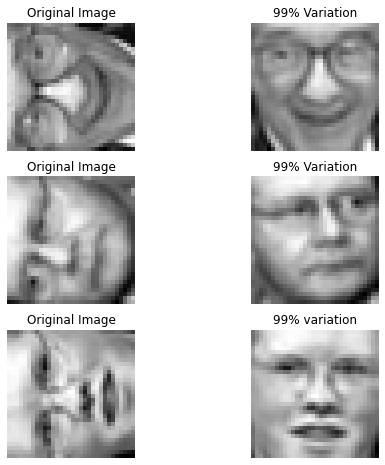

In [19]:
for i in range(0,X_norm.shape[0]):
    X_norm[i,] = X_norm[i,].T
    approximation[i,] = approximation[i,].T
fig4, axarr = plt.subplots(3,2,figsize=(8,8))
axarr[0,0].imshow(X_norm[0,],cmap='gray')
axarr[0,0].set_title('Original Image')
axarr[0,0].axis('off')
axarr[0,1].imshow(approximation[0,],cmap='gray')
axarr[0,1].set_title('99% Variation')
axarr[0,1].axis('off')
axarr[1,0].imshow(X_norm[1,],cmap='gray')
axarr[1,0].set_title('Original Image')
axarr[1,0].axis('off')
axarr[1,1].imshow(approximation[1,],cmap='gray')
axarr[1,1].set_title('99% Variation')
axarr[1,1].axis('off')
axarr[2,0].imshow(X_norm[2,],cmap='gray')
axarr[2,0].set_title('Original Image')
axarr[2,0].axis('off')
axarr[2,1].imshow(approximation[2,],cmap='gray')
axarr[2,1].set_title('99% variation')
axarr[2,1].axis('off')
plt.show()